Finding Heavy Traffic Indicators on I-94

The objective is to find indicators of heavy traffic

In [19]:
import pandas as pd
import numpy as np
import datetime as dt
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
metro.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
metro.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

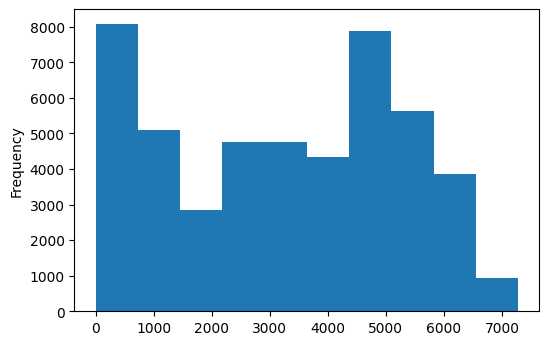

In [8]:
metro['traffic_volume'].plot.hist()

In [9]:
metro.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [21]:
metro['date_time']=pd.to_datetime(metro['date_time'])# convert 'date_time' column to datetime class

In [27]:
day_time = metro[(metro['date_time'].dt.hour > 7) & (metro['date_time'].dt.hour < 19)]
night_time = metro[(metro['date_time'].dt.hour <= 7) | (metro['date_time'].dt.hour >= 19)]

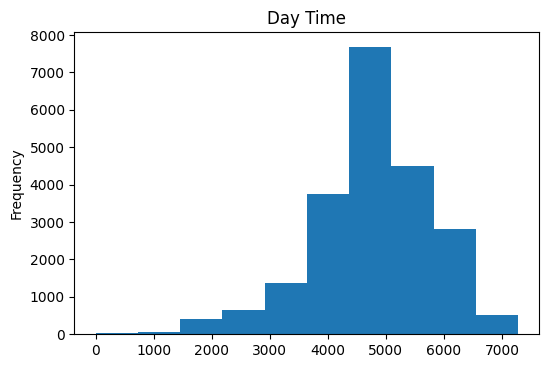

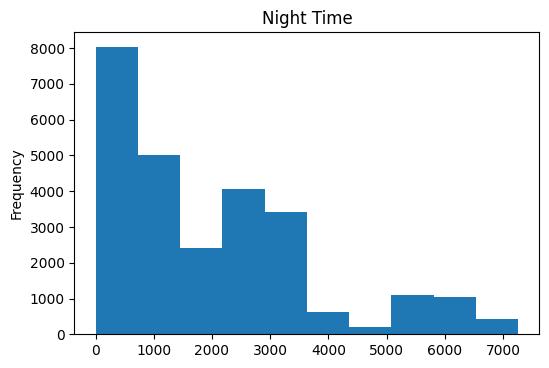

In [31]:
day_time['traffic_volume'].plot.hist()
plt.title('Day Time')
plt.show()

night_time['traffic_volume'].plot.hist()
plt.title('Night Time')
plt.show()


'Night Time' histogram is left skewed with most of the traffic on the lower end. 'Day Time' histogram shows that most of the traffic is on the higher end.

Since the goal is to find indicators of heavy traffic, using the nighttime data would be pointless.

In [32]:
day_time.describe()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,21798.000000,21798.000000,21798.000000,21798.000000,21798.000000
mean,282.616187,0.566004,0.000273,53.383109,4764.132948
std,13.233172,66.593320,0.009253,37.403446,1021.369570
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,273.000000,0.000000,0.000000,5.000000,4271.000000
50%,284.130000,0.000000,0.000000,75.000000,4792.000000
75%,293.987500,0.000000,0.000000,90.000000,5410.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [33]:
night_time.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,26406.000000,26406.000000,26406.000000,26406.000000,26406.000000
mean,280.041662,0.142964,0.000181,46.043021,2018.015375
std,13.312483,1.131005,0.007148,39.995392,1713.201969
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.600000,0.000000,0.000000,1.000000,581.000000
50%,281.280000,0.000000,0.000000,40.000000,1485.000000
75%,290.550000,0.000000,0.000000,90.000000,2934.000000
max,307.680000,55.630000,0.510000,100.000000,7260.000000


In [34]:
day_time['month']=day_time['date_time'].dt.month
by_month=day_time.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-34-aa919bbf5c91>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4499.832053
2     4705.570170
3     4896.060371
4     4887.885428
5     4901.648341
6     4905.114035
7     4595.017576
8     4918.958227
9     4870.988249
10    4934.438125
11    4698.226291
12    4422.761261
Name: traffic_volume, dtype: float64

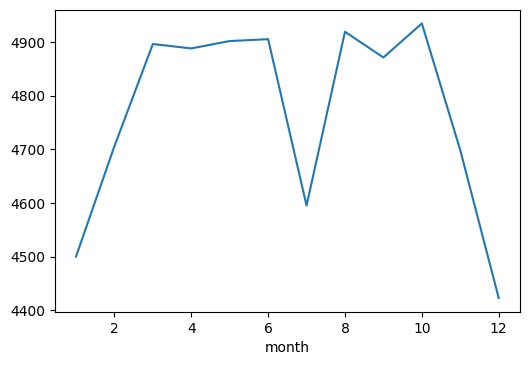

In [35]:
by_month['traffic_volume'].plot.line()

Significant drops in traffic volume on Jan and Dec

In [36]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-36-e42a3e605df7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4807.164138
1    5109.419471
2    5207.297083
3    5228.966580
4    5220.602140
5    4119.368251
6    3652.753150
Name: traffic_volume, dtype: float64

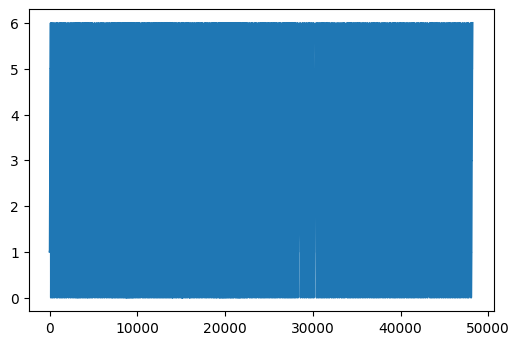

In [37]:
day_time['dayofweek'].plot.line()

In [40]:
day_time['hour'] = day_time['date_time'].dt.hour
bussiness_days = day_time.copy()[day_time['dayofweek'] <= 4] # 4 == Friday
weekend = day_time.copy()[day_time['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-40-634df4e6b376>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



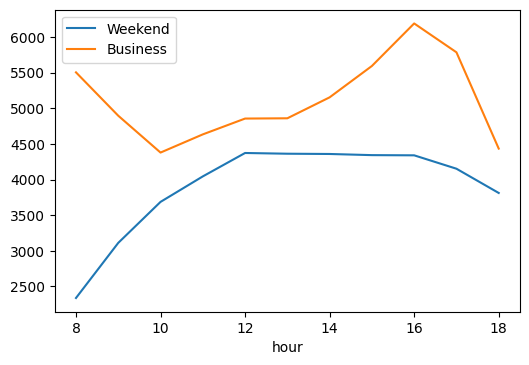

In [44]:
by_hour_weekend['traffic_volume'].plot.line(label='Weekend')
by_hour_business['traffic_volume'].plot.line(label='Business')
plt.legend()

The rush hours on business days are between 14:00 and 17:00

There are generally fewer traffic volumes on business days

In [51]:
day_time.corr()['traffic_volume']

temp              0.145568
rain_1h           0.004704
snow_1h           0.002119
clouds_all       -0.038819
traffic_volume    1.000000
month            -0.018321
dayofweek        -0.376709
hour              0.233560
Name: traffic_volume, dtype: float64

temp has the strongest correlation.

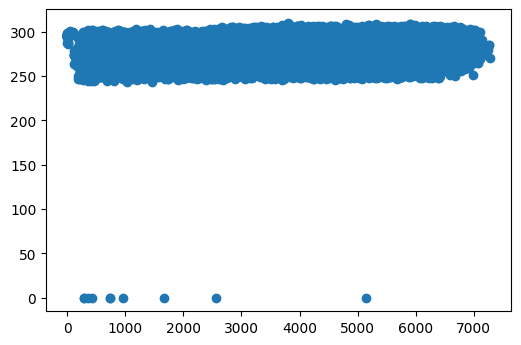

In [52]:
plt.scatter(metro['traffic_volume'],metro['temp'])
plt.show()

There isn't much information in the scatter plot. the weather columns aren't reliable indicators of heavy traffic.

In [53]:
by_weather_main=day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()

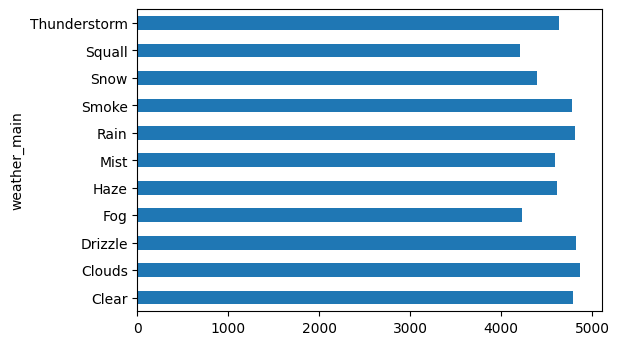

In [54]:
by_weather_main['traffic_volume'].plot.barh()

There is no traffic volume exceeding 5000 cars

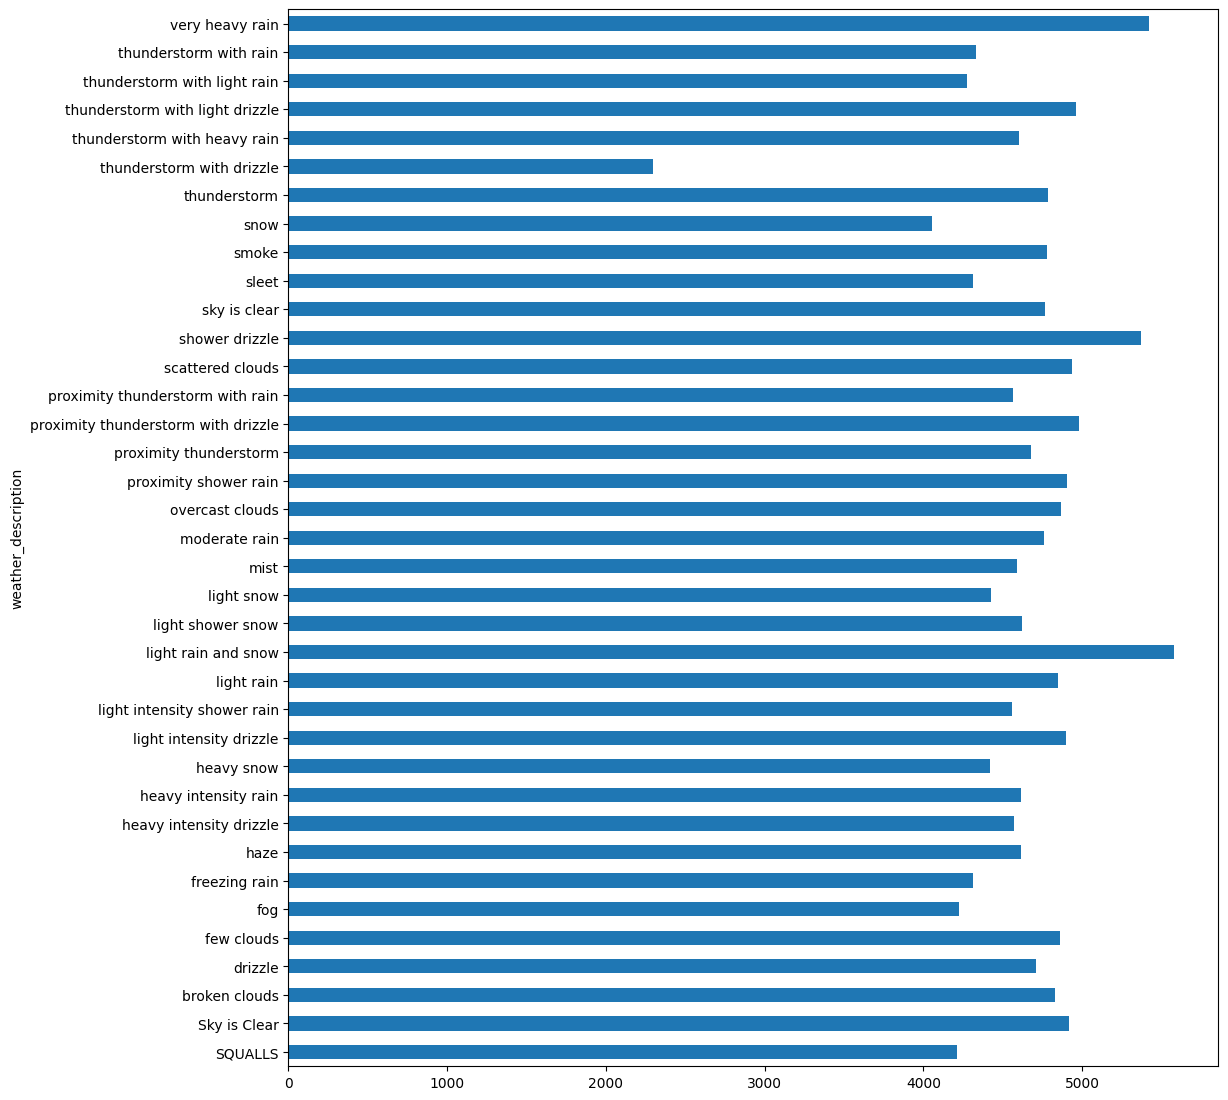

In [57]:
by_weather_description['traffic_volume'].plot.barh(figsize=(12,14))


Light rain, Shower Drizzle, Very Heavy Rain are indicators of very high traffic volume.
High precipitation is an indicator of high traffic volume.
There is a logrithmic increase in traffic volume on weekends though lower compared to business days.
On business days, the rush hours are around 7 and 16.